In [1]:
import pandas as pd
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import janitor as jn
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)
from imblearn.over_sampling import (
    SMOTE, ADASYN
)
from seaborn import diverging_palette

/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in

In [3]:
from imblearn.over_sampling import (
    SMOTE, ADASYN
)
import configparser
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

## Import the clean data file

In [4]:
fraud = pd.read_csv('fraud_clean.csv')
label = pd.read_csv('fraud_label.csv')
#fraud

In [5]:
label = label.drop(columns='Unnamed: 0')
#label.value_counts()

In [6]:
fraud = fraud.drop(columns='Unnamed: 0')
fraud.columns

Index(['MonthOfAccident', 'WeekOfMonthOfAccident', 'MonthClaimed',
       'WeekOfMonthClaimed', 'AgeOfPolicyHolder', 'RepNumber', 'Deductible',
       'DriverRating', 'PoliceReportFiled', 'WitnessPresent', 'Year',
       'DayOfWeekOfAccident', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePriceRange', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeRangeOfPolicyHolder',
       'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
       'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10699 entries, 0 to 10698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MonthOfAccident         10699 non-null  float64
 1   WeekOfMonthOfAccident   10699 non-null  float64
 2   MonthClaimed            10699 non-null  float64
 3   WeekOfMonthClaimed      10699 non-null  float64
 4   AgeOfPolicyHolder       10699 non-null  float64
 5   RepNumber               10699 non-null  float64
 6   Deductible              10699 non-null  float64
 7   DriverRating            10699 non-null  float64
 8   PoliceReportFiled       10699 non-null  float64
 9   WitnessPresent          10699 non-null  float64
 10  Year                    10699 non-null  float64
 11  DayOfWeekOfAccident     10699 non-null  float64
 12  Make                    10699 non-null  float64
 13  AccidentArea            10699 non-null  float64
 14  DayOfWeekClaimed        10699 non-null

## Modeling Preparation

### Train test split

In [8]:
X = fraud
y = label
X_train, X_val_test, y_train, y_val_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=0)
print(len(X_train))
print(len(X_val_test))
print(len(y_train))
print(len(y_val_test))

7489
3210
7489
3210


### Test validation split

In [9]:
# test set will not be used for the model, will test use it at the end
# validation test 
X_val, X_test, y_val, y_test = model_selection.train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=0)
print(len(X_val))
print(len(X_test))
print(len(y_val))
print(len(y_test))

1605
1605
1605
1605


## Evaluation Metrics

### Classficiation Score

In [10]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

### Classification Metrics

In [11]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

### ROC Curve

In [12]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### PR Curve

In [13]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

## Dealing with imbalanced classes

* From the graph below we can see that the target variable has a cleared skew in the Non-fraud class (0) compared with the fraud class (1). The Non-fraud class proportion is around 93% of the whole training dataset. It is considered as a Moderate Imbalance Class, as the proportion of minority class is between 1-20% of the dataset.
* Undersampling would decrease the proportion of your majority class until the number is similar to the minority class. At the same time, Oversampling would resample the minority class proportion following the majority class proportion.

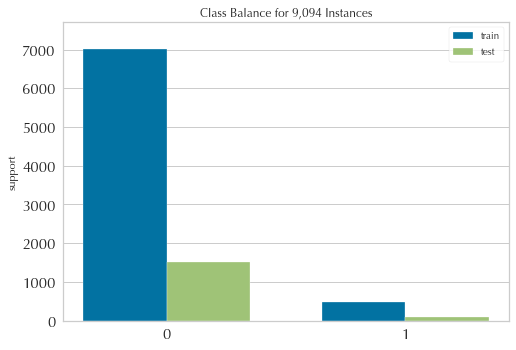

In [15]:
from yellowbrick.target import ClassBalance
y_train_1 = np.array(y_train).flatten()
y_val_1 = np.array(y_val).flatten()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y_train_1, y_val_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Training with imbalanced data using logistic regression
* From the results of the confusion matrix, we can clearly see that the prediction tends to predict Non-fraud class (0) rather than Fraud class (1).  The bias is in the dataset.

/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: Deprecati

Validation Result:

accuracy score: 0.9433



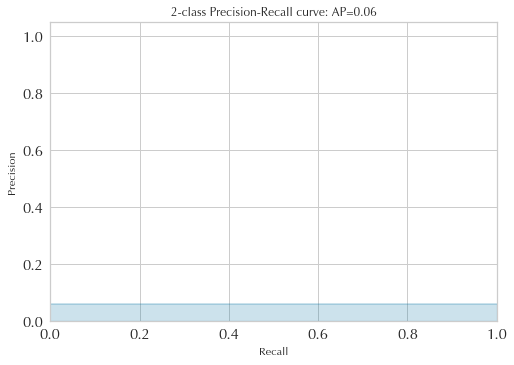

roc auc score: 0.5



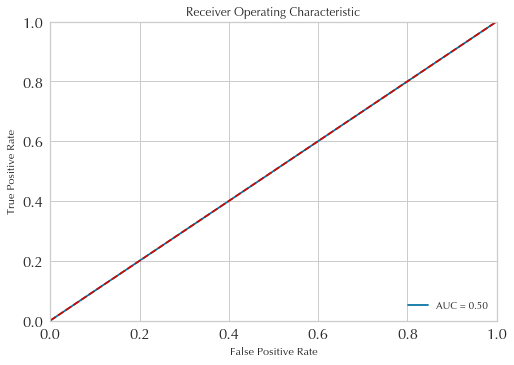

/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1514
           1       0.00      0.00      0.00        91

    accuracy                           0.94      1605
   macro avg       0.47      0.50      0.49      1605
weighted avg       0.89      0.94      0.92      1605


Confusion Matrix: 
 [[1514    0]
 [  91    0]]

End of validation Result



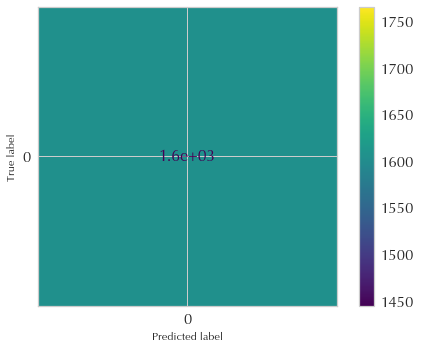

In [20]:
from sklearn.linear_model import LogisticRegression
clf_log_reg_imbalanced = LogisticRegression(random_state=0)
clf_log_reg_imbalanced.fit(X_train, y_train)
clf_score(clf_log_reg_imbalanced, X_train, y_train, X_val, y_val, train=False)

#### Created an oversampled training data using SMOTE
* From the result of the model trained with the oversampled data, we can see that the model doing better at predicted Fraud class (1), as the precision, recall and f1-score increased.  As the oversampled data helps the logistic regression model to predict the results better

In [16]:
sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_inde

In [21]:
# Run Logistic Regression on up-sampled data
clf_log_reg_smote = LogisticRegression(random_state=0)
clf_log_reg_smote.fit(X_train_sm, y_train_sm)

/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/scipy/optimize/lbfgsb.py:329: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/User

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Validation Result:

accuracy score: 0.6218



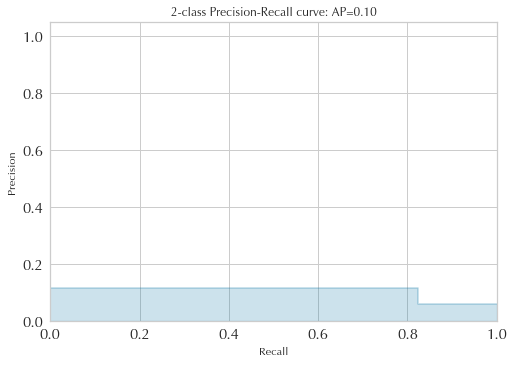

roc auc score: 0.7169095765529054



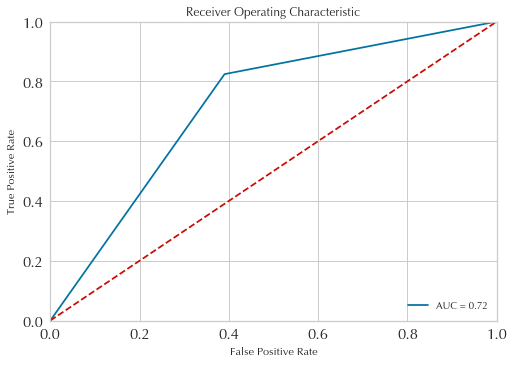

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.61      0.75      1514
           1       0.11      0.82      0.20        91

    accuracy                           0.62      1605
   macro avg       0.55      0.72      0.48      1605
weighted avg       0.93      0.62      0.72      1605


Confusion Matrix: 
 [[923 591]
 [ 16  75]]

End of validation Result



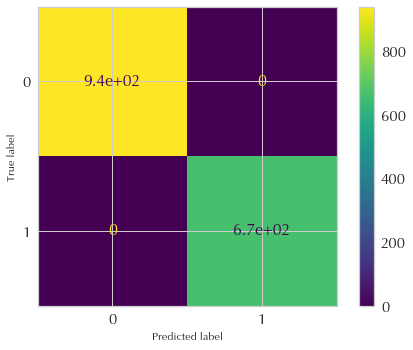

In [22]:
clf_score(clf_log_reg_smote, X_train_sm, y_train_sm, X_val, y_val, train=False)

## Create DataFrame from np array

In [19]:
# Train, validation and test DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_val_df = pd.DataFrame(X_val, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Full dataframe to be used for CV
X = pd.concat([X_train_df, X_val_df, X_test_df])

#y_train = np.reshape(y_train,(len(y_train),1))
#y_val = np.reshape(y_val,(len(y_val),1))
#y_train = pd.DataFrame(y_train,columns='target')
#y_val = pd.DataFrame(y_val,columns='target')
y = pd.concat([y_train, y_val, y_test])

In [22]:
full_df = pd.concat([X.reset_index(drop=True),
                     y.reset_index(drop=True)],
                    axis=1)
full_df.head(10)

,MonthOfAccident,WeekOfMonthOfAccident,MonthClaimed,WeekOfMonthClaimed,AgeOfPolicyHolder,RepNumber,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,Year,DayOfWeekOfAccident,Make,AccidentArea,DayOfWeekClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePriceRange,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeRangeOfPolicyHolder,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P
0,-0.975087,-0.624565,-0.965759,0.238109,-1.857752,1.422429,-0.175084,0.451735,-0.169850,-0.078785,0.168792,2.0,6.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,5.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,-0.112592,-0.624565,-0.100716,-0.555514,1.233954,0.111990,-0.175084,0.451735,-0.169850,-0.078785,1.414241,6.0,5.0,1.0,6.0,1.0,1.0,0.0,6.0,2.0,5.0,4.0,2.0,1.0,6.0,6.0,0.0,3.0,0.0,0.0,0.0,0
2,0.174907,-0.624565,0.187632,1.825356,1.478036,1.204023,-0.175084,1.344608,-0.169850,-0.078785,-1.076658,2.0,13.0,1.0,6.0,1.0,1.0,0.0,2.0,1.0,1.0,4.0,2.0,1.0,7.0,7.0,0.0,1.0,0.0,0.0,2.0,0
3,0.174907,0.929983,0.187632,1.031733,0.257626,0.330396,-0.175084,-0.441137,5.887558,-0.078785,1.414241,6.0,13.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,6.0,5.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.112592,-0.624565,-0.100716,0.238109,-0.555981,-1.198450,-0.175084,-1.334009,-0.169850,-0.078785,1.414241,6.0,2.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,5.0,4.0,2.0,3.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,0
5,-1.550084,0.152709,-1.542454,1.031733,0.420347,1.422429,-0.175084,-1.334009,-0.169850,-0.078785,0.168792,5.0,13.0,1.0,4.0,1.0,1.0,0.0,2.0,1.0,1.0,4.0,2.0,2.0,6.0,5.0,0.0,2.0,0.0,0.0,2.0,0
6,-1.262586,-1.401840,-1.254106,-0.555514,1.396675,1.204023,-0.175084,-0.441137,-0.169850,-0.078785,0.168792,7.0,13.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,2.0,0.0,7.0,7.0,0.0,3.0,0.0,0.0,0.0,0
7,1.612399,-1.401840,1.629371,0.238109,1.722118,-1.635263,-0.175084,0.451735,-0.169850,-0.078785,0.168792,7.0,17.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0,1.0,7.0,7.0,0.0,0.0,0.0,2.0,1.0,0
8,-1.262586,0.929983,-0.965759,1.031733,2.861167,0.767209,-0.175084,1.344608,-0.169850,-0.078785,-1.076658,6.0,17.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,7.0,8.0,0.0,2.0,4.0,1.0,0.0,0
9,-0.687589,-0.624565,-0.677411,0.238109,1.233954,0.330396,-0.175084,-0.441137,-0.169850,-0.078785,-1.076658,3.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0,1


## Modeling

### Baseline Model - Dummy Classifier

In [26]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_sm, y_train_sm)

/Users/juliana/opt/anaconda3/envs/imblearn/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

Validation Result:

accuracy score: 0.4854



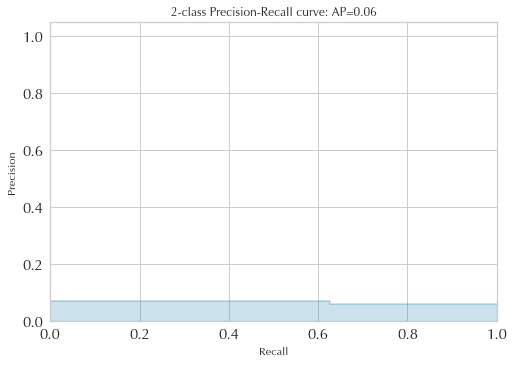

roc auc score: 0.5167085226530405



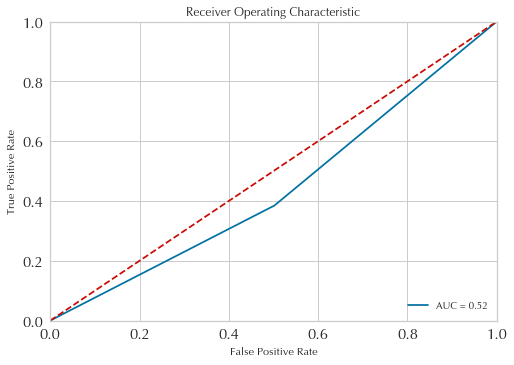

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.48      0.64      1514
           1       0.05      0.44      0.09        91

    accuracy                           0.48      1605
   macro avg       0.49      0.46      0.36      1605
weighted avg       0.88      0.48      0.60      1605


Confusion Matrix: 
 [[737 777]
 [ 53  38]]

End of validation Result



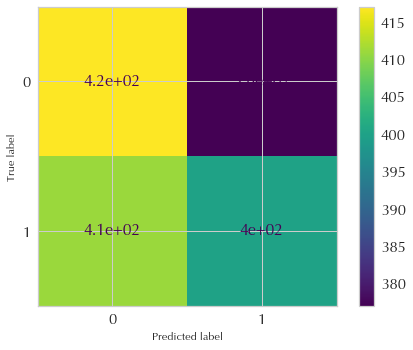

In [27]:
clf_score(clf_dummy, X_train_sm, y_train_sm, X_val, y_val, train=False)

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=40, random_state=0)
clf_rf.fit(X_train_sm, y_train_sm)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Validation Result:

accuracy score: 0.9408



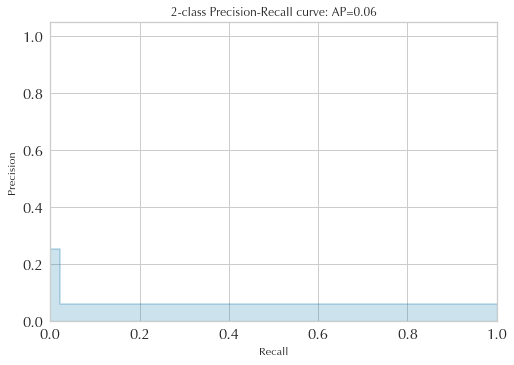

roc auc score: 0.5090075050444931



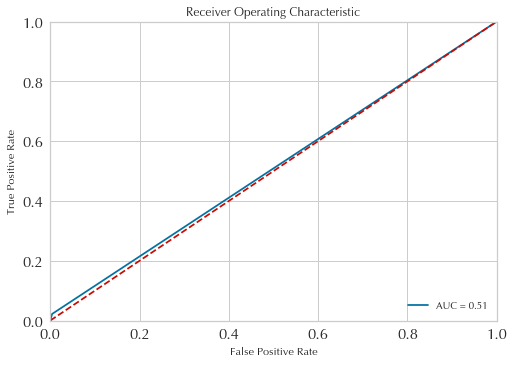

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1514
           1       0.25      0.02      0.04        91

    accuracy                           0.94      1605
   macro avg       0.60      0.51      0.50      1605
weighted avg       0.90      0.94      0.92      1605


Confusion Matrix: 
 [[1508    6]
 [  89    2]]

End of validation Result



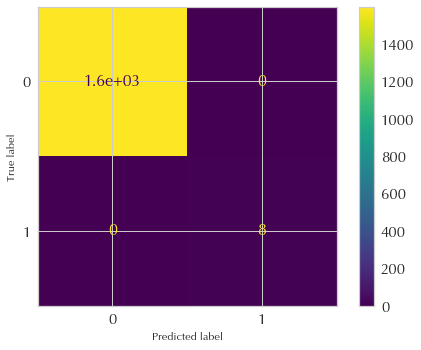

In [45]:
clf_score(clf_rf, X_train_sm, y_train_sm, X_val, y_val, train=False)

#### Results
Confusion Matrix
* True Negative: # of obs that are predicted to be Non-fraud, and they are actually Non-fraud
* False Positive: # of obs that are predicted to be fraud, but they are actually Non-fraud
* False Negative: # of obs that are predicted to be Non-fraud, but they are actually fraud
* True Positive: # of obs that are predicted to be fraud, and they are actually fraud
* Conclusion: need a model with low FN rate
Precision, recall, f1-score
* Presicion: If the model identifies a people as fraud, the prob that is right is 25%
* Recall: Among fraud people, the prob that model identify them as fraud is 2%
* Conclusion: pretty bad model in terms of precision and recall for fraud detection

####  Hyperparameter tuning with Grid Search

In [41]:
clf_rf_grid = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, 'auto','log2'],
    "n_estimators": [100,200,300],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split":[2,10,25,50],
    "random_state": [0],
    "max_depth":[5,10,15,25]
}

cv = model_selection.GridSearchCV(clf_rf_grid, params,
                                  n_jobs=-1).fit(X_train_sm, y_train_sm)
print(cv.best_params_)

{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}


In [42]:
clf_rf_best = ensemble.RandomForestClassifier(
    **{
        "max_features": 'log2',
        "n_estimators": 300,
        "min_samples_leaf": 1,
        "min_samples_split":2,
        "random_state": 0,
        "max_depth":25
    })
clf_rf_best.fit(X_train_sm, y_train_sm)
clf_rf_best.score(X_test, y_test)

0.9314641744548287

Validation Result:

accuracy score: 0.9315



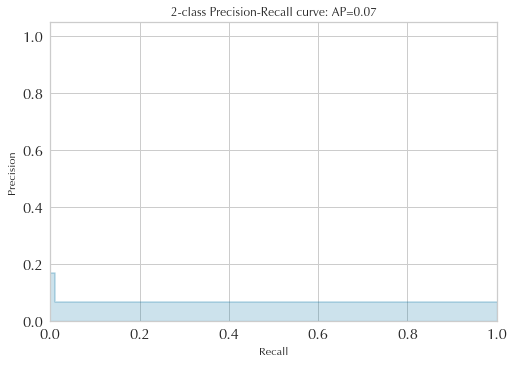

roc auc score: 0.5030492026130629



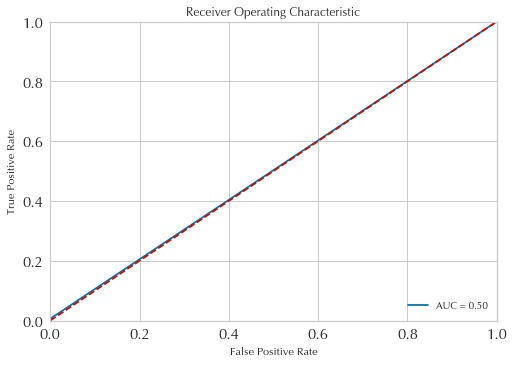

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1499
           1       0.17      0.01      0.02       106

    accuracy                           0.93      1605
   macro avg       0.55      0.50      0.49      1605
weighted avg       0.88      0.93      0.90      1605


Confusion Matrix: 
 [[1494    5]
 [ 105    1]]

End of validation Result



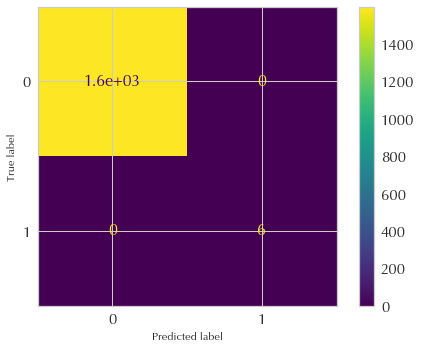

In [43]:
clf_score(clf_rf_best, X_train_sm, y_train_sm, X_test, y_test, train=False)

#### Evaluation on test set
##### Class prediction error

In [ ]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    clf_rf, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

##### Classification Report

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    clf_rf, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

##### Confusion_matrix

In [ ]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf_rf, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

##### Feature importance

In [ ]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(clf_rf, labels=df.columns)
viz.fit(X_train_small, y_train_small)
viz.poof()

In [ ]:
from yellowbrick.features import RFECV
fig, ax = plt.subplots(figsize=(6, 4))
rfe = RFECV(
    ensemble.RandomForestClassifier(
        n_estimators=100
    ),
    cv=5,
)
rfe.fit(X_train_small, y_train_small)
rfe.rfe_estimator_.ranking_
rfe.rfe_estimator_.n_features_
rfe.rfe_estimator_.support_
rfe.poof()

#### Learning Curve

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(
    clf_rf,
    cv=cv,
    train_sizes=sizes,
    scoring="f1_weighted",
    n_jobs=4,
    ax=ax,
)
lc_viz.fit(X_train_small, y_train_small)
lc_viz.poof()

### Adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada_boost.fit(X_train_sm, y_train_sm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

Validation Result:

accuracy score: 0.9315



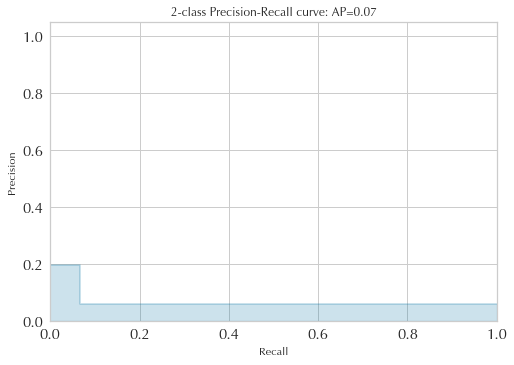

roc auc score: 0.5247107581982087



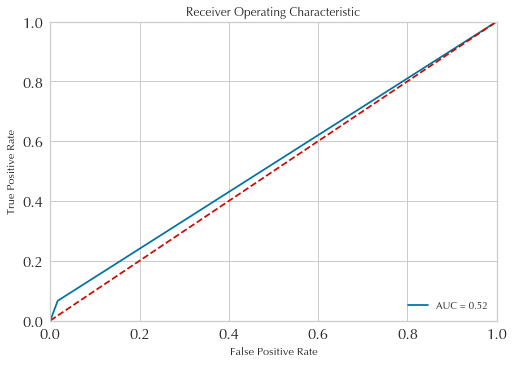

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1514
           1       0.19      0.07      0.10        91

    accuracy                           0.93      1605
   macro avg       0.57      0.52      0.53      1605
weighted avg       0.90      0.93      0.92      1605


Confusion Matrix: 
 [[1489   25]
 [  85    6]]

End of validation Result



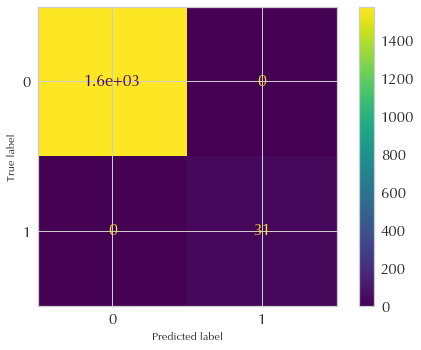

In [36]:
clf_score(clf_ada_boost, X_train_sm, y_train_sm, X_val, y_val, train=False)

#### Results
Confusion Matrix
* True Negative: # of obs that are predicted to be Non-fraud, and they are actually Non-fraud
* False Positive: # of obs that are predicted to be fraud, but they are actually Non-fraud
* False Negative: # of obs that are predicted to be Non-fraud, but they are actually fraud
* True Positive: # of obs that are predicted to be fraud, and they are actually fraud
* Conclusion: need a model with low FN rate
Precision, Recall, F1-score
* Presicion: If the model identifies a people as fraud, the prob that is right is 19%
* Recall: Among fraud people, the prob that model identify them as fraud is 7%
* F1-score: increase to 10%
* Conclusion: better model in terms of precision, recall and f1-score for fraud detection compared with random forest

#### Hyperparameter tuning for adaboost

In [37]:
params = {
    "n_estimators": [100,200,300],
    "learning_rate": [0.001, 0.01, 0.1, 0.2,0.5],
}

cv = model_selection.GridSearchCV(AdaBoostClassifier(random_state=0), 
                                  param_grid=params).fit(X_train_sm, y_train_sm)
print(cv.best_params_)

{'learning_rate': 0.5, 'n_estimators': 300}


In [38]:
clf_ada_boost_best = AdaBoostClassifier(n_estimators=300,learning_rate=0.5,random_state=0)
clf_ada_boost_best.fit(X_train_sm, y_train_sm)
clf_ada_boost_best.score(X_test, y_test)

0.9289719626168225

Validation Result:

accuracy score: 0.9290



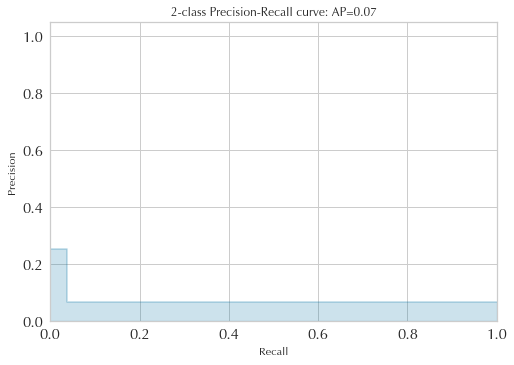

roc auc score: 0.5148652560826715



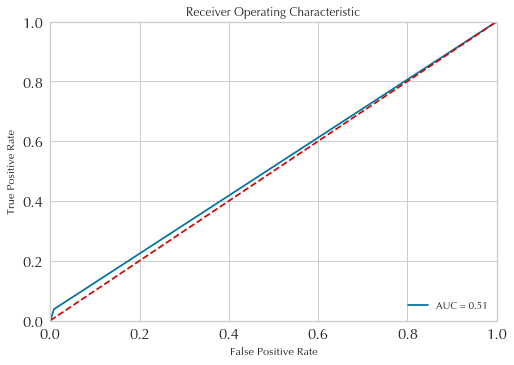

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1499
           1       0.25      0.04      0.07       106

    accuracy                           0.93      1605
   macro avg       0.59      0.51      0.51      1605
weighted avg       0.89      0.93      0.90      1605


Confusion Matrix: 
 [[1487   12]
 [ 102    4]]

End of validation Result



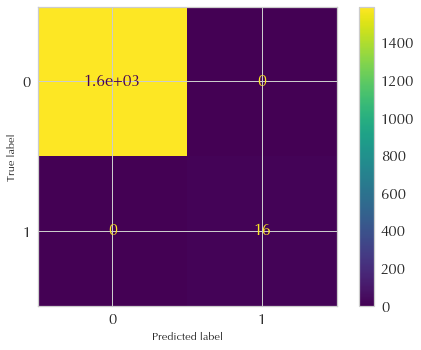

In [40]:
clf_score(clf_ada_boost_best, X_train_sm, y_train_sm, X_test, y_test, train=False)

#### Results
Confusion Matrix
* True Negative: # of obs that are predicted to be Non-fraud, and they are actually Non-fraud
* False Positive: # of obs that are predicted to be fraud, but they are actually Non-fraud
* False Negative: # of obs that are predicted to be Non-fraud, but they are actually fraud
* True Positive: # of obs that are predicted to be fraud, and they are actually fraud
* Conclusion: need a model with low FN rate
Precision, Recall, F1-score
* Presicion: If the model identifies a people as fraud, the prob that is right is 25%
* Recall: Among fraud people, the prob that model identify them as fraud is 4%
* F1-score: decrease to 7 %
* Conclusion: Worse than adaboost base model in terms of recall

#### Evaluation on test set
##### Class prediction error

In [ ]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    clf_rf, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

##### Classification Report

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    clf_rf, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

##### Confusion_matrix

In [ ]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf_rf, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

##### Feature importance

In [ ]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(clf_rf, labels=df.columns)
viz.fit(X_train_small, y_train_small)
viz.poof()

In [ ]:
from yellowbrick.features import RFECV
fig, ax = plt.subplots(figsize=(6, 4))
rfe = RFECV(
    ensemble.RandomForestClassifier(
        n_estimators=100
    ),
    cv=5,
)
rfe.fit(X_train_small, y_train_small)
rfe.rfe_estimator_.ranking_
rfe.rfe_estimator_.n_features_
rfe.rfe_estimator_.support_
rfe.poof()